In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten
from keras.applications.vgg16 import VGG16

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/Fire_Aug/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224)
)
val_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/Fire_Aug/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224)
)

Found 1108 files belonging to 2 classes.
Found 403 files belonging to 2 classes.


In [3]:
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [4]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(conv_base)
# model.add(Conv2D(4096,kernel_size=(7,7),activation='relu'))
# model.add(Dropout(0.5))
# model.add(Conv2D(4096,kernel_size=(1,1),activation='relu'))
# model.add(Dropout(0.5))
# model.add(Conv2D(2622,kernel_size=(1,1),activation='relu'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 1, 1, 4096)          │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1, 4096)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 1, 1, 4096)          │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 1, 4096)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 2622)          │      10,742,334 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2622)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,623 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145,005,501 (553.15 MB)

 Trainable params: 145,005,501 (553.15 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
conv_base.trainable = False

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 522s 15s/step - accuracy: 0.7777 - loss: 0.9619 - val_accuracy: 0.9429 - val_loss: 0.1364
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 49s 232ms/step - accuracy: 0.9447 - loss: 0.1318 - val_accuracy: 0.9529 - val_loss: 0.1185
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 234ms/step - accuracy: 0.9883 - loss: 0.0392 - val_accuracy: 0.9454 - val_loss: 0.1371
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.9949 - loss: 0.0189 - val_accuracy: 0.9479 - val_loss: 0.1481
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 233ms/step - accuracy: 0.9972 - loss: 0.0129 - val_accuracy: 0.9479 - val_loss: 0.1093
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.9479 - val_loss: 0.1342
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9454 - val_loss: 0.1508
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accurac

In [17]:
model.save("/content/Fire_detection.h5")

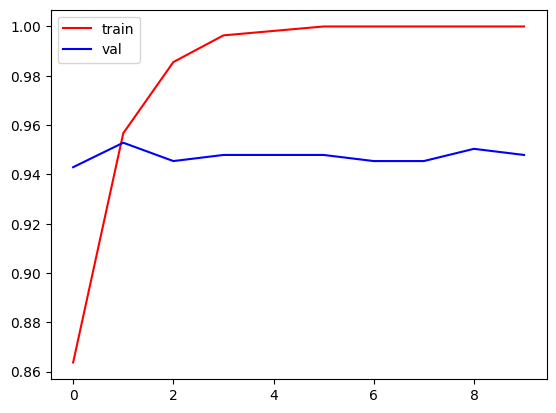

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='val')
plt.legend()
plt.show()

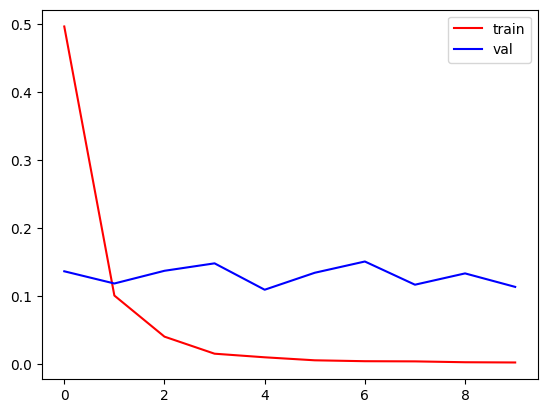

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='val')
plt.legend()
plt.show()

In [21]:
import cv2
fire = cv2.imread("/content/fire_forest_check.jpeg")
fire = cv2.resize(fire,(224,224))
fire = fire/255
fire = fire.reshape(1,224,224,3)
model.predict(fire)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.00051324]], dtype=float32)

In [22]:
fire = cv2.imread("/content/forest_check.jpg")
fire = cv2.resize(fire,(224,224))
fire = fire/255
fire = fire.reshape(1,224,224,3)
model.predict(fire)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.7315661]], dtype=float32)

In [23]:
fire = cv2.imread("/content/WildfireSmoke.jpeg")
fire = cv2.resize(fire,(224,224))
fire = fire/255
fire = fire.reshape(1,224,224,3)
model.predict(fire)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.30008146]], dtype=float32)